In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
spx = pd.read_csv("CQF_June_2023_M1L1_SPX.csv").set_index("Date")
spx.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
03/01/1928,17.760000,17.760000,17.760000,17.760000,17.760000,0
04/01/1928,17.719999,17.719999,17.719999,17.719999,17.719999,0
05/01/1928,17.549999,17.549999,17.549999,17.549999,17.549999,0
06/01/1928,17.660000,17.660000,17.660000,17.660000,17.660000,0
09/01/1928,17.500000,17.500000,17.500000,17.500000,17.500000,0


In [4]:
spx = spx.drop(columns=["Adj Close"])

In [5]:
spx['Returns'] = 0.0

In [6]:
for i in range(len(spx) - 1):
    current_price = spx.iloc[i]['Close']
    next_price = spx.iloc[i + 1]['Close']
    returns = (next_price - current_price) / current_price
    spx.at[spx.index[i+1], 'Returns'] = returns

In [7]:
spx.head()
spx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23973 entries, 03/01/1928 to 08/06/2023
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     23973 non-null  float64
 1   High     23973 non-null  float64
 2   Low      23973 non-null  float64
 3   Close    23973 non-null  float64
 4   Volume   23973 non-null  int64  
 5   Returns  23973 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.8+ MB


In [8]:
print(spx["Returns"].describe())

count    23973.000000
mean         0.000301
std          0.011989
min         -0.204669
25%         -0.004569
50%          0.000480
75%          0.005460
max          0.166096
Name: Returns, dtype: float64


In [9]:
low, high = spx["Returns"].quantile([0.05, 0.95])
trim = spx["Returns"].between(low, high)
spx_rtrim = spx[trim]

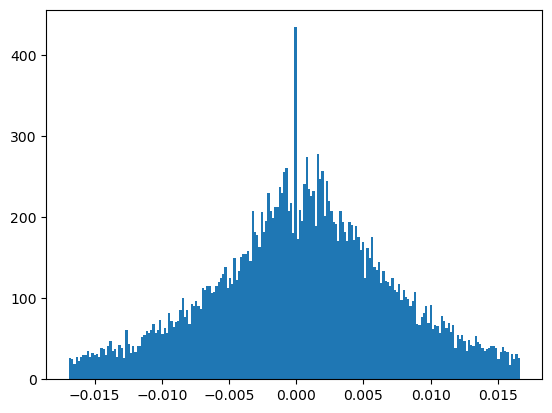

In [12]:
plt.hist(spx_rtrim["Returns"], bins=200);